In [ ]:
!pip install -q torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 56.6 MB/s eta 0:00:00


In [ ]:
import torch

In [ ]:
torch.__version__

'2.3.0+cu121'

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
# rough for revision
import numpy as np

torch.tensor([[1,2,3]], device = "cpu").numpy()

torch.from_numpy(np.array([1,2,3]))

# Torch tenosrs can be converted into numpy arrays and vice versa with a catch that
# if the the torch tensor is on cuda/gpu it can not be converted into numpy array.
# torch tensors can be converted into numpy array by merely calling numpy() method
# on it i.e a.numpy(), while a numpy array a can be coverted into torch tensor as
# follows: torch.from_numpy(a)

# now a torch tensor or a model can be sent to the assigned device whether gpu or cpu
# by merely uisng to(device) command where device is alredy defined either as cpu or
# gpu using the command torch.device("cuda" if torch.cuda.is_available() else "cpu")

# let me learn some operations on torch tensors

# addition, substraction, point wise multiplication and division is as usual.
tensor1 = torch.tensor([[1, 2, 3], [5, 6, 7]])
transpose = tensor1.t()

# matrix multiplication
tensor2 = torch.tensor([[1, 2],[3, 4], [5, 6]])
tensor1.matmul(tensor2)

# sum of all elements
torch.sum(tensor1)

# sum along axis
torch.sum(tensor1, axis = 0) # sum along rows, i.e picks individual columns and sum its elements

torch.sum(tensor1, axis = 1) # sum along columns, i.e picks individual rows and sum its elements

# slicing, broadcasting is similar to numpy

# shape of a tensor ( two ways)
tensor1.shape
tensor1.size()

tensor1.shape == tensor1.size() # the answer is True

# specifying datatype inside a tensor

torch.tensor([[1, 2, 3], [5, 6, 7]], dtype = torch.float)
torch.tensor([[1.0, 2.0, 3.0], [5.0, 6.0, 7.0]], dtype = torch.int32)


# random number generation using torch

# uniform (0,1)
torch.rand(2,3) # generate a random unifrom sample of the shape (2,3)

# normal
torch.randn(2, 3)

# generating random integer with specified range

# Generating a 2x3 random tensor with integers between 0 and 9
torch.randint(0, 10, (2, 3))


x = torch.tensor([1.0, 2.0], requires_grad = True)
z = x**2
z.backward(torch.tensor([3.0, 3.0]))
w = z.detach()
x.grad
w

tensor([1., 4.])

In [ ]:
# Creating an empty tensor
x = torch.empty(3)
y = torch.empty((3, 5))
# Basically torch.empty((3, 5)) and torch.empty(3, 5) aren't dfferent
x.to(device)
z = torch.ones(5, device = device)
z.device

device(type='cuda', index=0)

In [ ]:
print(y[0][0])
y

tensor(-1.0524e-37)


tensor([[-1.0524e-37,  3.0878e-41,  1.4013e-45,  0.0000e+00, -1.0524e-37],
        [ 3.0878e-41, -1.0524e-37,  3.0878e-41,  3.3631e-44,  2.9427e-44],
        [-2.1368e-04,  4.4843e-41,  2.8026e-45,  4.4843e-41,  0.0000e+00]])

In [ ]:
y.shape
print(torch.empty(3,5).shape)
torch.empty((3,5)).shape

torch.Size([3, 5])


torch.Size([3, 5])

In [ ]:
torch.zeros(4, 6)
torch.ones((2,3))

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
z = torch.zeros((3,2), dtype = torch.int32)

In [ ]:
# Now this is how we create a general tensors

w = torch.tensor([1.0, 2.0, 3.0], dtype = torch.int32)

# This also teaches us one thing if we specify the dtype, it converts to the given data type if possible

<ipython-input-5-478c7aaee7a2>:3: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  w = torch.tensor([1.0, 2.0, 3.0], dtype = torch.int32)


In [ ]:
print(w)

r = torch.tensor([1,2,4], dtype = torch.float32)
r

tensor([1, 2, 3], dtype=torch.int32)


tensor([1., 2., 4.])

In [ ]:
# Random values

a = torch.rand(2,2)
b = torch.rand(2,2)

In [ ]:
# a+b will do the elementwise addition of the tensors a and b, another way to do it is a.add(b), if i want to do the inplace addition ie the
# value of a should be replaced by a+b, then the command for that is a.add_(b), lets try the last one too

print(a.add(b))
print(a.add_(b))
a

# Things are working as expected, everytime i am running it it add b agains so in the n time
# it wil throw a+nb, as a is basically updated to a+(n-1)b in the (n-1)th iterarion

# Also every function that has a trailing undercore like add_ will do an inplace operation



tensor([[1.3090, 0.7030],
        [0.8220, 0.9496]])
tensor([[1.3090, 0.7030],
        [0.8220, 0.9496]])


tensor([[1.3090, 0.7030],
        [0.8220, 0.9496]])

In [ ]:
# Substraction (point wise)
a - b
a.sub_(b)


tensor([[0.5963, 0.1422],
        [0.7237, 0.8534]])

In [ ]:
# Multiplication (point wise)

print(a*b)
print(a.mul(b))
print(a.mul_(b))

tensor([[0.4250, 0.0797],
        [0.0712, 0.0821]])
tensor([[0.4250, 0.0797],
        [0.0712, 0.0821]])
tensor([[0.4250, 0.0797],
        [0.0712, 0.0821]])


In [ ]:
# Division (point wise)
print(a)
print(b)
print(a/b)
print(a.div(b))
print(a.div_(b)) # recall : a will be replaced by a/b

tensor([[0.4250, 0.0797],
        [0.0712, 0.0821]])
tensor([[0.7127, 0.5608],
        [0.0984, 0.0962]])
tensor([[0.5963, 0.1422],
        [0.7237, 0.8534]])
tensor([[0.5963, 0.1422],
        [0.7237, 0.8534]])
tensor([[0.5963, 0.1422],
        [0.7237, 0.8534]])


In [ ]:
# I am checking broadcasting

a = torch.tensor([[1,2,3], [2,3,4]])
a + torch.tensor([1,2,3])

# I have tried different broadcasting features, it works

tensor([[2, 4, 6],
        [3, 5, 7]])

In [ ]:
# Tensor slicing is same as numpy, basically a[1, 2] gives the
# item in the row number 1 (infact 2 as starts with 0) and column
# number 3, a[:, 1] will give column number 1 but the output
# will be a row vector

d = torch.rand(5,3)
print(d)
print(d[:, 1].shape)
print(d[1,2])
print(d[1, :])


tensor([[0.3681, 0.9339, 0.6253],
        [0.2650, 0.6916, 0.1364],
        [0.6939, 0.0182, 0.1252],
        [0.4222, 0.0913, 0.7349],
        [0.0265, 0.8365, 0.4312]])
torch.Size([5])
tensor(0.1364)
tensor([0.2650, 0.6916, 0.1364])


In [ ]:
# I remeber that in tesnorflow i can not assign assign element by simply writing a[1,2] = 5, which i needed there was a[1,2].assign(5),
# let me try to check my memory here and also see if we can do simple assignments in torch

import tensorflow as tf
ta = tf.Variable([[1,2,3], [2,3,4]])
ta[1,2].assign(10)
ta

# Now we try in pytorch

a
a[1,2] = 10
a

# So in pytorch the assignment is same as that of numpy

tensor([[ 1,  2,  3],
        [ 2,  3, 10]])

In [ ]:
# if we have only one value in the tensor, we can use
# .item() to take out the value, but be careful this
# can be used only when we have one value in the tensor

d[1,2].item() # this is a plain number, no relation with torch now

0.1363844871520996

In [ ]:
# Reshaping a tensor in torch, but before we do that i will just add how we used to do that in tensorflow too

# Tensorflow
# import tensorflow as tf
# tfa = tf.Variable([1,2,3,4,5,6])
# tf.reshape(tfa, (3,2))

# Pytorch
pya = torch.rand(4,6)

# First of all the size can be printed in various ways

print(pya.shape)
print(pya.size())

# both above ways give the same result

pyb = pya.view(24)

pyb = pya.view(8, -1)

pyc = pya.view(-1, 2)

print(pyb)
print(pyc)

print(pya.view(3, 8))


torch.Size([4, 6])
torch.Size([4, 6])
tensor([[0.2326, 0.1312, 0.3143],
        [0.8972, 0.4192, 0.7101],
        [0.0406, 0.9830, 0.8718],
        [0.8996, 0.8585, 0.5530],
        [0.6777, 0.5854, 0.3515],
        [0.0849, 0.5016, 0.9098],
        [0.0989, 0.1796, 0.3558],
        [0.5717, 0.0582, 0.8489]])
tensor([[0.2326, 0.1312],
        [0.3143, 0.8972],
        [0.4192, 0.7101],
        [0.0406, 0.9830],
        [0.8718, 0.8996],
        [0.8585, 0.5530],
        [0.6777, 0.5854],
        [0.3515, 0.0849],
        [0.5016, 0.9098],
        [0.0989, 0.1796],
        [0.3558, 0.5717],
        [0.0582, 0.8489]])
tensor([[0.2326, 0.1312, 0.3143, 0.8972, 0.4192, 0.7101, 0.0406, 0.9830],
        [0.8718, 0.8996, 0.8585, 0.5530, 0.6777, 0.5854, 0.3515, 0.0849],
        [0.5016, 0.9098, 0.0989, 0.1796, 0.3558, 0.5717, 0.0582, 0.8489]])


In [ ]:
# Let's explore how numpy as torch interects
import torch
import numpy as np
a = torch.ones(5)
b = a.numpy()
type(b)

# Note: If the code is running on GPU and not CPU, then
# a and b maps to same memory location, so if i make change
# to a it will reflect in b as well, for example
a.add_(1)
print(a)
print(b)


# Great, as stated the array is same, one is pytorch array and the other is numpy array but they are identical


# Update: Upon new attempt i found that if a is a GPU tensor then it can't be converted to numpy,
# it gives the error "can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first."

tensor([2., 2., 2., 2., 2.])
[1. 1. 1. 1. 1.]


In [ ]:
pkt = torch.tensor([1.2, 2.3, 3.4])
pkt = pkt.to(device)
# so the leanring is that just pkt.to(device) would not send pkt to cuda rather it makes a copy of pkt on cuda to you need to assign pkt pkt.to(device)
print(pkt)
print(pkt.is_cuda)
print(pkt.cpu().numpy()) # so a cuda tensor can not be converted into numpy array,
# it needs to be sent to cpu first which can be done by tnsr.cpu() where tnsr is the torch tensor

pkn = pkt.cpu().numpy()

pkt.add_(1)
print(pkt)
print(pkn)

# obsrvation: if we change pkt using pkt.add_(1) and pkt is cpu tensor, the chnage would reflect in pkn as well.
# No change would reflect on pkn if it is cuda tensor or we make change using command pkt = pkt+1



tensor([1.2000, 2.3000, 3.4000], device='cuda:0')
True
[1.2 2.3 3.4]
tensor([2.2000, 3.3000, 4.4000], device='cuda:0')
[1.2 2.3 3.4]


In [ ]:
# Now we learn how to convert a numpy array into the torch tensor
a = np.ones((5,2))

b = torch.from_numpy(a)
# b = b.to(device)
# Now let me test for the memory allocation

a += 1
print(a)
print(b)
print(b.device)
print(device)

# when i make b a GPU tensor then a and b are different, b doesn't get updated with
# change in a, but if we make b as cpu tensor then b will also get updated. Another update a = a + 1 make a new tensor while a += 1
# means make change to a at the same location, so this experiment works when a += 1 is done not when a = a + 1 is performed.
# Thus when numpy array is on cpu and the corresponding torch tenosr is also on cpu then a += 1 will reflect in the torch tensor and vice versa
# which means is a is a torch tensor on cpu and b = a.numpy() and a+=1 is performed then b will also be impacted. Also, in either case if a and b
# are numpy and torch tensor formed by from_numpy or .numpy() operation then they are connected and changes in one would reflect on other.
# Now torch tensor on cuda can not be converted into numpy array directly so no such question but when opposite happens like numpy array
# is converted into tenosr and then  sent to device then done expect change in numpy guy to be reflected in torch guy. In summary
# the sending to cuda process creates tensor at another location and thus will break the connection. Like when i create a numpy
# array a = np.array([1,2,3]) its on cpu similar for torch tensor thus its easy to connect these guys to reflect the chnages of
# one another into the other, while when one is sent on gpu's vram its not possible .

# overall, when on cpu the tensors are mapped to one object so changing one will change other but if it's a cuda tensor, they would be different

[[2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]]
tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]], device='cuda:0', dtype=torch.float64)
cuda:0
cuda


In [ ]:
# Also note, numpy can not handle GPU tensors, so if i have a GPU torch tenosr and i want to convet it
# into numpy by .numpy() command it wont work, so the tensor first need to be converted to CPU tensor using command t.cpu()
# and the only i can convert it to numpy as proceed


In [ ]:
# Now, similar to varaible in the tensorflow, there is a concept here too, but here within the tensor itself,
# we specify requires_grad to True, which is by default false, this lets the system know that we may compute
# the gradient for these in future

a = torch.tensor([1.0, 2.0, 3.0], requires_grad= True)

In [ ]:
a

tensor([1., 2., 3.], requires_grad=True)

In [ ]:
# Now we will learn how to find gradients in pytorch, this tool is USP of hardcore packages like tensorflow and pytorch

In [ ]:
# Lets create a tensor x, with respect to which i will be finding the gradient

x = torch.randn(3, requires_grad= True)

y = x+2
print(x)
print(y)

z = 2*(y**2)

w = torch.mean(z)

print(z)
print(w)
w.backward()
print(x.grad)

tensor([-0.6853,  1.0300,  0.5914], requires_grad=True)
tensor([1.3147, 3.0300, 2.5914], grad_fn=<AddBackward0>)
tensor([ 3.4571, 18.3623, 13.4302], grad_fn=<MulBackward0>)
tensor(11.7499, grad_fn=<MeanBackward0>)
tensor([1.7530, 4.0401, 3.4551])


In [ ]:
# Lets do the gradient finding in pytorch again

x = torch.randn(3, requires_grad = True)
y = x**2
z = y.mean()

# Basically, in a layman language pytorch has made the computational graph starting from x and then to y and
# then to z, so when we print y, one arg is grad_fn whose value is powbackward, in z the grad_fn is mean_backward,
# so basically pytorch now knows that when the gradient of z is demanded it should move backward by mean to find
# grd wrt y and then move backward by gradient for power to get from y to x and basiaclly using chain rule it can
# multiply both graidents to throw the gradient of z wrt x

# So in order to trigger this backpropagation to compute the gradient, what we do is; run the command z.backward()
# and then we can print the gradient wrt x by x.grad, lets try it

z.backward()
print(x)
x.grad

# Yeah this seems to work


tensor([ 0.9906,  1.4166, -1.4822], requires_grad=True)


tensor([ 0.6604,  0.9444, -0.9881])

In [ ]:
# Now what i want to try is write a function of x and then specify x and z and find the gradient,

def f(x):
  return(((torch.sin(x))**2 + 2*(x**2) + x).mean())

x = torch.randn(3, requires_grad = True)
z = f(x)

print(x)
z.backward()
x.grad


tensor([-0.6140, -0.3155, -1.3784], requires_grad=True)


tensor([-0.7993, -0.2840, -1.6297])

In [ ]:

import tensorflow as tf
x = tf.Variable([ 1.7441,  0.6658, -1.0226])


def g(x):
  return (tf.reduce_mean(tf.square(tf.math.sin(x)) + 2*tf.square(x) + x))

with tf.GradientTape(persistent= True) as tape:
  z = g(x)

tape.gradient(z, x)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 2.5455637,  1.5449096, -1.3266551], dtype=float32)>

In [ ]:
# So what we observe is both of them work equally good, what next i want to figure out is how does converting
# one torch fn into tensorflow function and tensorflow function into torch fn and also the varibles

In [ ]:
# The output was a scalar in the above case, what if it's a vector too, in that case the output should be a m, n matrix is the map goes from R^n to R^m
# Lets try it, first tensorflow

x = tf.random.normal([3])
with tf.GradientTape(persistent = True) as tape:
  tape.watch(x)
  z = [tf.Variable(1.0), x[1]**2, x[0]*x[1]*x[2]]

print(x)
print(z)
print(tape.gradient(z, x))

# So what i observe is that it gives the number of outputs same as number of inputs, and what it does is it will find the derivative of all the f_i wrt to that particular input and sum that up ans that would be the output, i.e it is tf.reduce_sum(jacobian, axis = 0)

tf.Tensor([ 0.15886523 -0.13268454  0.19663806], shape=(3,), dtype=float32)
[<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>, <tf.Tensor: shape=(), dtype=float32, numpy=0.017605187>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.004144926>]
tf.Tensor([-0.02609083 -0.23413014 -0.02107896], shape=(3,), dtype=float32)


In [ ]:
# Just testing my memory by using both the tf gradient and torch gradient

import tensorflow as tf
atf = tf.Variable([0.1, 2.3, 3.1])

def tffn(x):
  return tf.reduce_mean(tf.sin(x)+tf.square(x+1)*tf.cos(x))

with tf.GradientTape(persistent = True) as tape:
  z = tffn(atf)

print(tape.gradient(z, atf))

# lets do it using pytorch
ator = torch.tensor([0.1, 2.3, 3.1], requires_grad = True)

def torfn(x):
  return torch.mean(torch.sin(x) + torch.cos(x)*torch.square(x+1))

w = torfn(ator)
w.backward()
print(ator.grad)

tf.Tensor([ 1.0210717 -4.3948092 -3.2970054], shape=(3,), dtype=float32)
tensor([ 1.0211, -4.3948, -3.2970])


In [ ]:

x = torch.randn(3, requires_grad = True)
z = torch.square(x)

z1 = torch.tensor([1, 0, 0])
z2 = torch.tensor([0, 1, 0])
z3 = torch.tensor([0, 0, 1])

z.backward(z3)
x.grad

# How the torch works is, in that case it takes a vector v as input to thr z.backward(v) and the returns the jacobian*v as the output

tensor([0.0000, -0.0000, 2.4395])

In [ ]:
# One more concept
x = torch.tensor(2.0, requires_grad = True)
y = x**2
z = 2*y


# if i do y.backward() and compute x.grad it would be 4, if i do z.backward()
# and compute x.grad it would be 8, what if i do both. Firstly it wont happen
# there will be error saying the computation graph was killed after first backward
# move, so if we still want to reatin computation graph make y.backward(retain_graph = True)
# and then i can again do z.backward() or vice versa. But if we do both what would be x.grad,
# it would be sum of both dy/dx + dz/dx, lets try

z.backward(retain_graph = True)
print(x.grad)


# if i dont want to add gradient on top of already computed one, i can make the gradient 0 by x.grad.zero_(), let try it
x.grad.zero_()
z.backward()
print(x.grad)

tensor(8.)
tensor(8.)


In [ ]:
# Now we learn how to prevent pytorch to compute the gradient

# There are three ways; 1) set x.requires_grad_(False) or x.detach() will create new tensor for which
# requires_grad would be false and the third was is with torch.no_grad(): and then write things below
# it, lets see how this can be done

# x = torch.randn(3, requires_grad = True)
# print(x)
# x.requires_grad_(False)
# print(x)
# We can see that x now does not have requires_grad within it

# x = torch.randn(3, requires_grad = True)
# y = x.detach()
# print(y)
# We can see that y does not have requires_grad within it

x = torch.randn(3, requires_grad = True)
with torch.no_grad():
  y = x+2

# y.backward() # this wont work as torch was not expected to createe the computational graph so not it can not do the backward operation
print(x.grad)
print(x)
# We can see that y does not have requires_grad within it

None
tensor([0.4455, 0.6560, 1.5768], requires_grad=True)


In [ ]:
# Another thing to note is that if my x is the input and it is used to generate multiple outputs z1, z2, z3 and
# so on and we kept on invoking the command z1.backward(), z2.backward() and z3.backward() then these individual
# gradients will keep on accumulting (adding) in x.grad, in other words x.grad = dz1_dx + dz2_dx + dz3_dx, in order
# to reset the grads to zero we can run the command x.grad.zero_(), one point to note that if z1, z2, z3 have an
# intersection in the computationa graph, then keep using retain_graph = True everytime we call backward, else the
# graph would expire after the first backward call

# Just an example to illustrate this is:

weights = torch.ones(4, dtype = torch.float32, requires_grad = True)

for epochs in range(3):
  model_output = (3*weights).sum()

  model_output.backward()

  print(weights.grad)

weights = torch.ones(4, dtype = torch.float32, requires_grad = True)

for epochs in range(3):
  model_output = (3*weights).sum()

  model_output.backward()

  print(weights.grad)

  weights.grad.zero_()


tensor(6)

In [ ]:
# Now we will build linear regression from scratch using pytorch and then later will automate it using the torch packages, lets build it from scratch here

# First every thing manually using the numpy

# Let X be the input data of shape n, p where n is the number of instance and p is the number of covariates, and y be the label of shape n,1
import numpy as np

class LinearRegression:
  def __init__(self, X, y):
    self.y = y
    self.n = X.shape[0]
    self.p = X.shape[1]
    self.X = np.array([[1.0]*(self.n)]+ list(X.T)).T
    self.weights = np.random.normal(0,1, self.p+1).reshape((-1, 1))
    self.learning_rate = 0.001
    self.n_iter = 5000

  def forward_pass(self):
    return (np.matmul(self.X, self.weights))

  def mse_loss(self):
    y_pred = self.forward_pass()
    return np.mean((y_pred-y)**2)

  def gradient(self):
    return (-2/self.n)*np.matmul((self.X).T, self.y - self.forward_pass())

  def update_weight(self):
    self.weights = self.weights - self.learning_rate*self.gradient()

  def call(self):
    for i in range(self.n_iter):
      self.update_weight()

  def predict(self, X_test):
    m = X_test.shape[0]
    return(np.matmul(np.array([[1.0]*m]+ list(X_test.T)).T, self.weights))





In [ ]:
# Lets test the custom linear regression package i built

def generate_label(X, real_weights):
  return(np.matmul(np.array([[1.0]*(X.shape[0])]+ list(X.T)).T, real_weights))

X = np.random.normal(3.0, 4.0, (10000,1))
real_weights = [[1.0], [0.3]]
y = generate_label(X, real_weights)

# print(real_weights)
# lin_reg = LinearRegression(X, y)
# lin_reg.call()
# print(lin_reg.weights)
y

array([[ 1.36912549e+00],
       [ 7.64352821e-01],
       [-1.84018166e-03],
       ...,
       [ 1.57755501e+00],
       [ 2.72010422e+00],
       [ 1.99151057e+00]])

In [ ]:
import numpy as np

def sigmoid(z):
  return (1.0/(1.0 + np.exp(z)))


class LogisticRegression:
  def __init__(self, X, y):
    self.y = y.reshape((-1,1))
    self.n = X.shape[0]
    self.p = X.shape[1]
    self.X = np.array([[1.0]*(self.n)]+ list(X.T)).T
    self.weights = np.random.normal(0,1, self.p+1).reshape((-1, 1))
    self.learning_rate = 0.01
    self.n_iter = 1000

  def forward_pass(self):
    return (sigmoid(-1*np.matmul(self.X, self.weights)))

  def categorical_cross_entropy_loss(self):
    y_pred = self.forward_pass()
    log_odds = np.log(y_pred/(1-y_pred))
    neg_pred_logs = np.log(1-y_pred)
    return -(np.matmul((self.y).T, log_odds)[0] + np.sum(neg_pred_logs))/self.n

  def gradient(self):
    return (-1/self.n)*np.matmul((self.X).T, self.y - self.forward_pass())


  def update_weight(self):
    self.weights = self.weights - self.learning_rate*self.gradient()

  def call(self):
    for i in range(self.n_iter):
      self.update_weight()

  def predict(self, X_test):
    m = X_test.shape[0]
    return (sigmoid(-1*np.matmul(np.array([[1.0]*m]+ list(X_test.T)).T, self.weights)))



In [ ]:
# Testing my custom logistic regression package
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

dataset = load_iris()
X_data = dataset["data"]
y_data = dataset["target"]

def binarize_this_data(z):
  return np.maximum(0, z-1)

y_data = binarize_this_data(y_data)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.1)
print(X_train.shape)
classifier = LogisticRegression(X_train, y_train)
classifier.weights
# y_pred = classifier.forward_pass()
classifier.call()
# classifier.weights
y_pred = np.maximum((classifier.predict(X_test)-0.5)/(np.abs(classifier.predict(X_test)-0.5)), 0)
y_pred
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(y_test)
print(y_pred)

(135, 4)
[[8 0]
 [1 6]]
0.9333333333333333
[0 0 1 0 1 0 0 1 0 1 0 0 1 1 1]
[[0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [ ]:
# Now we will automate stuffs using Pytorch (torch implementation of linear regression)
import torch

X = torch.tensor([1,2,3,4], dtype = torch.float32)
y = torch.tensor([2,4,6,8], dtype = torch.float32)

w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

def forward(x):
  return w*x

def loss(y, y_predicted):
  return ((y-y_predicted)**2).mean()

learning_rate = 0.01
n_iters = 100

for epochs in range(n_iters):
  #forward pass
  y_pred = forward(X)

  # loss
  l = loss(y, y_pred)


  # # dl/dw
  l.backward()

  # #weight update (as this should be part of computational graph for grad computation so it should be wrapped within with fn as follows)
  with torch.no_grad():
    w = w - learning_rate*w.grad

  w = torch.tensor(w, requires_grad = True)
  # print(w.grad)

  # As we had leant that, grads keeps on accumumating on w.grad, so we need to zero them up, so zering the gradient

  # w.zero_grad() # this is not applied as the gradient has already been set to none

print(w)



tensor(2.0000, requires_grad=True)


<ipython-input-6-a2673db043f9>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w = torch.tensor(w, requires_grad = True)


In [ ]:
# Now we replace manually computed gradient and update by pytorch classes

# General steps in pytroch 1) Design our model (input size, output size, forward pass ie layers and stuffs) 2) Loss and optimizer 3) training loop
# Note, this is same as that in keras and tensorflow, which first involves model architecture fixing and the model.compile which handles loss fn,
# optimizer, metrics etc and the model.fit carries details about training i.e data and epochs

# We have fitted model in the three steps: 1) forward pass: compute predictions 2) backward pass: gradients 3) update weights

# Now as we will be using the torch libraries to automate some of the stuff, one library to import is torch.nn

import torch.nn as nn

X = torch.tensor([1,2,3,4], dtype = torch.float32)
y = torch.tensor([2,4,6,8], dtype = torch.float32)

w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

def forward(x):
  return w*x

learning_rate = 0.01
n_iters = 1000

loss = nn.MSELoss() # this is a callable function i.e if i input y_true and y_pred in loss it would compute the loss, will see this within the for loop
optimizer = torch.optim.SGD([w], lr = learning_rate)

for epochs in range(n_iters):
  #forward pass
  y_pred = forward(X)

  # loss
  l = loss(y, y_pred)

  # # dl/dw
  l.backward()

  # #weight update (as this should be part of computational graph for grad computation so it should be wrapped within with fn as follows)
  optimizer.step()

  # # As we had leant that, grads keeps on accumumating on w.grad, so we need to zero them up, so zeroing the gradient

  optimizer.zero_grad()

print(w)

# This is working cool


tensor(2.0000, requires_grad=True)


In [ ]:
# Next here we replace every manual component i.e forward pass too, and will use pytorch fully

# First thing the input and output should have proper size, i.e X is n, p and y is n,1 size matrix
# we will not need w as the model parameters could be tracked by model.parameters() command
# Third thing we need to input the input size and the output size as the parameter in the model
import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32)

n_sample, n_feature = X.shape
input_size = n_feature
output_size = y.shape[1]
model = nn.Linear(input_size, output_size)

learning_rate = 0.01
n_iters = 1000

loss = nn.MSELoss() # this is a callable function i.e if i input y_true and y_pred in loss it would compute the loss, will see this within the for loop
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epochs in range(n_iters):
  #forward pass
  y_pred = model(X)

  # loss
  l = loss(y, y_pred)

  # # dl/dw
  l.backward()

  # #weight update (as this should be part of computational graph for grad computation so it should be wrapped within with fn as follows)
  optimizer.step()

  # # As we had leant that, grads keeps on accumumating on w.grad, so we need to zero them up, so zering the gradient

  optimizer.zero_grad()


model(torch.tensor([[5.0], [3.0]]))

# This is working cool

tensor([[9.9931],
        [5.9998]], grad_fn=<AddmmBackward0>)

In [ ]:

# custom linear model using subclassing technique

import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32)

n_sample, n_feature = X.shape
input_size = n_feature
output_size = y.shape[1]


# Model using subclassing technique

class LinearReg(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    # define layers
    self.lin = nn.Linear(input_size, output_size)

  # also need to implement the forward pass
  def forward(self, X):
    return self.lin(X)

model = LinearReg(input_size, output_size)

learning_rate = 0.01
n_iters = 1000

loss = nn.MSELoss() # this is a callable function i.e if i input y_true and y_pred in loss it would compute the loss, will see this within the for loop
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epochs in range(n_iters):
  #forward pass
  y_pred = model(X)

  # loss
  l = loss(y, y_pred)

  # # dl/dw
  l.backward()

  # #weight update (as this should be part of computational graph for grad computation so it should be wrapped within with fn as follows)
  optimizer.step()

  # # As we had leant that, grads keeps on accumumating on w.grad, so we need to zero them up, so zering the gradient

  optimizer.zero_grad()

model(torch.tensor([[5.0], [3.0]]))



tensor([[9.9779],
        [5.9994]], grad_fn=<AddmmBackward0>)

In [ ]:
class LinearReg(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    # define layers
    self.lin = nn.Linear(input_size, output_size)

  # also need to implement the forward pass
  def forward(self, X):
    return self.lin(X)

model = LinearReg(input_size, output_size)

X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)

Model = LinearReg(input_size, output_size)
Model(X)

# Here we do not need to get the values by Model.forward(X) and just Model(X) is enough, this is
# In the super class, nn.Module, there is a __call__ method which obtains the forward function
# from the subclass and calls it., to read more about all this refer to the following link:
# https://medium.com/@ariellemesser/pytorch-nn-module-super-classes-sub-classes-inheritance-and-call-speci-3cc277407ff5

tensor([[1.3478],
        [1.7887],
        [2.2297],
        [2.6706]], grad_fn=<AddmmBackward0>)

In [ ]:
# Now i will fit logistic regression using pytorch, where the model will be built using subclassing API

import torch
import numpy as np
import torch.nn as nn
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# There are four steps in fitting the model, 1) preparing dataset 2) fitting model architecture
# 3) loss and optimizer 4) Training (forward pass(compute prediction and loss),
# backward pass (compute gradient) and update weight)

# Lets being

# 0) Dataset

bc = datasets.load_breast_cancer()
X_data = bc["data"]
y_data = bc["target"]

y_data = y_data.reshape((-1, 1))
y_data.shape

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.1)

#scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Converting to torch array from numpy

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# 1) Model (will build using subclassing api)

start = time.time()

n_instance, n_features = X_train.shape

class LogisticRegression(nn.Module):
  def __init__(self, input_shape):
    super().__init__()
    self.lin_layer = nn.Linear(input_shape, 1)

  def forward(self, X):
    return torch.sigmoid(self.lin_layer(X))

model = LogisticRegression(n_features)

learning_rate = 0.01
n_iters = 100

loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for i in range(n_iters):

  # forward_pass (prediction + loss)
  y_pred = model(X_train)

  l = loss(y_pred, y_train)

  # compute gradient

  l.backward()

  # update_weights + empty_grad

  optimizer.step()

  optimizer.zero_grad()


test_pred = model(X_test)

# Finding predictions and converting it into numpy for accuracy score to work, this also needs detach to detach it from gard stuff
y_predictions = test_pred.round().detach().numpy()

print(accuracy_score(y_predictions, y_test.numpy()))

end = time.time()
print(end-start)
device


0.9298245614035088
0.05435967445373535


device(type='cuda')

In [ ]:
# Now i will fit logistic regression using pytorch, where the model will be built using subclassing API
# (trying the same stuff on GPU)

import torch
import numpy as np
import torch.nn as nn
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# There are four steps in fitting the model, 1) preparing dataset 2) fitting model architecture
# 3) loss and optimizer 4) Training (forward pass(compute prediction and loss),
# backward pass (compute gradient) and update weight)

# Lets being

# 0) Dataset

bc = datasets.load_breast_cancer()
X_data = bc["data"]
y_data = bc["target"]

y_data = y_data.reshape((-1, 1))
y_data.shape

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.1)

#scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Converting to torch array from numpy

X_train = torch.from_numpy(X_train.astype(np.float32)).to(device)
X_test = torch.from_numpy(X_test.astype(np.float32)).to(device)
y_train = torch.from_numpy(y_train.astype(np.float32)).to(device)
y_test = torch.from_numpy(y_test.astype(np.float32)).to(device)

# 1) Model (will build using subclassing api)

start = time.time()

n_instance, n_features = X_train.shape

class LogisticRegression(nn.Module):
  def __init__(self, input_shape):
    super().__init__()
    self.lin_layer = nn.Linear(input_shape, 1)

  def forward(self, X):
    return torch.sigmoid(self.lin_layer(X))

model = LogisticRegression(n_features).to(device)

learning_rate = 0.01
n_iters = 100

loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for i in range(n_iters):

  # forward_pass (prediction + loss)
  y_pred = model(X_train)

  l = loss(y_pred, y_train)

  # compute gradient

  l.backward()

  # update_weights + empty_grad

  optimizer.step()

  optimizer.zero_grad()


test_pred = model(X_test)

# Finding predictions and converting it into numpy for accuracy score to work, this also needs detach to detach it from gard stuff
y_predictions = test_pred.round().detach().cpu().numpy()

print(accuracy_score(y_predictions, y_test.cpu().numpy()))

end = time.time()
print(end-start)
device


0.9824561403508771
0.0670475959777832


device(type='cuda')

In [ ]:
# Now dataset and Dataloader in pytorch

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

# Will do later



In [ ]:
# Dataset Transform

# torch.softmax, nn.CrossEntropyLoss()
# Gyan: For nn.BCELoss(), torch.sigmoid needs to be computed before but torch.softmax doesn't need to be computed for nn.CrossEntropyLoss()

# Command Dictionary
# import torch.nn as nn
# torch.nn
# nn.Module
# torch.sigmoid
# torch.softmax
# torch.relu
# torch.tanh
# nn.MSELoss()
# nn.BCELoss()
# nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# optimizer.step()
# optimizer.zero_grad()
# nn.Linear(input_size, output_size)
# nn.ReLU
# nn.TanH
# nn.Sigmoid
# nn.Softmax
# nn.LeakyReLU
# import torch.nn.Functional as F
# F.relu()
# F.leaky_relu()


# layer
nn.Linear

# activation
nn.ReLU
nn.Sigmoid
nn.TanH
nn.Softmax
nn.LeakyReLU
import torch.nn.Functional as F
F.relu()
F.leaky_relu()

# loss
nn.MSELoss()
nn.BCELoss()
nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer.step()
optimizer.zero_grad()

# subclassing is done on nn.Module and within it the initialization has to be done and the forward method has to be written, for example

class MyNeuralNetwork(nn.Module):
  def __init__(self, input_size, output_size, hidden_size):
    super().__init__()
    self.linear_layer = nn.Linear(input_size, hidden_size)
    self.hidden_layer = nn.Linear(hidden_size, hidden_size)
    self.output_layer = nn.Linear(hidden_size, output_size)

  def forward(self, X):
    X = self.linear_layer(X)
    X = nn.ReLU(X)
    X = self.hidden_layer(X)
    X = nn.Functional.leaky_relu(X)
    X = self.output_layer(X)
    return nn.Sigmoid(X)

model = MyNeuralNetwork(input_size = 10, output_size = 1, hidden_size = 5)





In [ ]:
# Now, lets build an algorithm for binary classification problem using pytorch

import torch
import torch.nn as nn

# Binary Classification

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size):
    super().__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)

  def forward(self, X):
    out = self.linear1(X)
    out = self.relu(out)
    out = self.linear2(out)
    # sigmoid at the end
    y_pred = torch.sigmoid(out)
    return y_pred


In [ ]:
model = NeuralNet(input_size = 28*28, hidden_size = 5)
criteria = nn.BCELoss()


In [ ]:
# Dataset and Dataloader

# First i will load wine data set from sklearn.datasets to work on it

from sklearn.datasets import load_wine
import numpy as np

wine_data = load_wine()

X_data = wine_data["data"]
y_data = wine_data["target"]
data = np.concatenate((X_data, y_data.reshape(-1, 1)), axis = 1)



In [ ]:
# Now we will learn the classes Dataset and Dataloader

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineData(Dataset):
  def __init__(self):  # this is used for dataloading
    self.xy = data # defined in the last code block
    self.x = torch.from_numpy(self.xy[:, :-1])
    self.y = torch.from_numpy(self.xy[:, [-1]])
    self.n_sample = (self.xy).shape[0]

  def __getitem__(self, index): # this is magical method for indexing, if i use data[i] it will return self.__getitem__(i)
    return self.x[index], self.y[index]

  def __len__(self): # this is magical method form finding length, so if i use len(data) it will compute the lenth
    return self.n_sample

# Now lets create the dataset

dataset = WineData()
# first_data = dataset[0]
# features, label = first_data
# print(features)
# print(label)




tensor([[1.4230e+01, 1.7100e+00, 2.4300e+00,  ..., 1.0400e+00, 3.9200e+00,
         1.0650e+03],
        [1.3200e+01, 1.7800e+00, 2.1400e+00,  ..., 1.0500e+00, 3.4000e+00,
         1.0500e+03],
        [1.3160e+01, 2.3600e+00, 2.6700e+00,  ..., 1.0300e+00, 3.1700e+00,
         1.1850e+03],
        ...,
        [1.3270e+01, 4.2800e+00, 2.2600e+00,  ..., 5.9000e-01, 1.5600e+00,
         8.3500e+02],
        [1.3170e+01, 2.5900e+00, 2.3700e+00,  ..., 6.0000e-01, 1.6200e+00,
         8.4000e+02],
        [1.4130e+01, 4.1000e+00, 2.7400e+00,  ..., 6.1000e-01, 1.6000e+00,
         5.6000e+02]], dtype=torch.float64)

In [ ]:
# Now lets use Dataloader

dataloader = DataLoader(dataset = dataset, batch_size = 4, shuffle = True, num_workers = 2)
enumerate(dataloader)
for i, (x, y) in enumerate(dataloader):
  if i> 6:
    break
  print (i)
  print (x, y)

0
tensor([[1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03],
        [1.3580e+01, 1.6600e+00, 2.3600e+00, 1.9100e+01, 1.0600e+02, 2.8600e+00,
         3.1900e+00, 2.2000e-01, 1.9500e+00, 6.9000e+00, 1.0900e+00, 2.8800e+00,
         1.5150e+03],
        [1.2420e+01, 1.6100e+00, 2.1900e+00, 2.2500e+01, 1.0800e+02, 2.0000e+00,
         2.0900e+00, 3.4000e-01, 1.6100e+00, 2.0600e+00, 1.0600e+00, 2.9600e+00,
         3.4500e+02],
        [1.4340e+01, 1.6800e+00, 2.7000e+00, 2.5000e+01, 9.8000e+01, 2.8000e+00,
         1.3100e+00, 5.3000e-01, 2.7000e+00, 1.3000e+01, 5.7000e-01, 1.9600e+00,
         6.6000e+02]], dtype=torch.float64) tensor([[0.],
        [0.],
        [1.],
        [2.]], dtype=torch.float64)
1
tensor([[1.2170e+01, 1.4500e+00, 2.5300e+00, 1.9000e+01, 1.0400e+02, 1.8900e+00,
         1.7500e+00, 4.5000e-01, 1.0300e+00, 2.9500e+00, 1.4500e+00, 2.2300e+00

In [ ]:
# Dummy training loop

num_epochs = 2
total_sample = len(dataset)

n_iteration = math.ceil(total_sample/4) # as 4 is the batch size we are using

print(total_sample, n_iteration)

178 45


In [ ]:
for epoch in range(num_epochs):
  for i, (input, labels) in enumerate(dataloader):
    # forward

    # backward

    # update_weights

    if (i+1)%5==0:
      print(f"epochs: {epoch+1}/{num_epochs}, step: {i+1}/{n_iteration}, inputs: {input.shape}")

epochs: 1/2, step: 5/45, inputs: torch.Size([4, 13])
epochs: 1/2, step: 10/45, inputs: torch.Size([4, 13])
epochs: 1/2, step: 15/45, inputs: torch.Size([4, 13])
epochs: 1/2, step: 20/45, inputs: torch.Size([4, 13])
epochs: 1/2, step: 25/45, inputs: torch.Size([4, 13])
epochs: 1/2, step: 30/45, inputs: torch.Size([4, 13])
epochs: 1/2, step: 35/45, inputs: torch.Size([4, 13])
epochs: 1/2, step: 40/45, inputs: torch.Size([4, 13])
epochs: 1/2, step: 45/45, inputs: torch.Size([2, 13])
epochs: 2/2, step: 5/45, inputs: torch.Size([4, 13])
epochs: 2/2, step: 10/45, inputs: torch.Size([4, 13])
epochs: 2/2, step: 15/45, inputs: torch.Size([4, 13])
epochs: 2/2, step: 20/45, inputs: torch.Size([4, 13])
epochs: 2/2, step: 25/45, inputs: torch.Size([4, 13])
epochs: 2/2, step: 30/45, inputs: torch.Size([4, 13])
epochs: 2/2, step: 35/45, inputs: torch.Size([4, 13])
epochs: 2/2, step: 40/45, inputs: torch.Size([4, 13])
epochs: 2/2, step: 45/45, inputs: torch.Size([2, 13])


In [ ]:
# Also pytoch has its own datasets as well for example MNSIT dataset
# could be loaded using the commnad torchvision.datasets.MNIST(), lets try to run it now

torchvision.datasets.MNIST(root = "/content/sample_data", download = True) # root here is the location where i want to dowsnload the data

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/sample_data/MNIST/raw/train-images-idx3-ubyte.gz to /content/sample_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/sample_data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/sample_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/sample_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/sample_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/sample_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/sample_data/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/sample_data
    Split: Train

In [ ]:
# Dataset Transform

# What transform does is tranforming the images, for example convert the numpy array to torch tensors
# and a lot others tranformation is supported evcen custom transforms can be made

import torch
import torchvision

dataset = torchvision.datasets.MNIST(root = "/content/sample_data", transform = torchvision.transforms.ToTensor(), download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/sample_data/MNIST/raw/train-images-idx3-ubyte.gz to /content/sample_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/sample_data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/sample_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/sample_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/sample_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/sample_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/sample_data/MNIST/raw



In [ ]:
# Last we built wine dataset class not lets equip it with custom transformation

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np

# First i will load wine data set from sklearn.datasets to work on it

from sklearn.datasets import load_wine
import numpy as np

wine_data = load_wine()

X_data = wine_data["data"]
y_data = wine_data["target"]
data = np.concatenate((X_data, y_data.reshape(-1, 1)), axis = 1)

# Now our dataset class will contain tranform too, lets look at the code below

class WineData(Dataset):
  def __init__(self, transform = None):  # this is used for dataloading
    self.xy = data # defined in the last code block
    self.x = self.xy[:, :-1]
    self.y = self.xy[:, [-1]]
    self.transform = transform
    self.n_sample= (self.xy).shape[0]

  def __getitem__(self, index): # this is magical method for indexing, if i use data[i] it will return self.__getitem__(i)
    sample =  self.x[index], self.y[index]

    if self.transform:
      return self.transform(sample)

    return sample

  def __len__(self): # this is magical method form finding length, so if i use len(data) it will compute the lenth
    return self.n_sample

# Lets create a custom ToTensor class

class ToTensor:
  def __call__(self, sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

# lets create another tranform

class MulTransform():
  def __init__(self, factor):
    self.factor = factor

  def __call__(self, sample):
    inputs, label = sample
    return self.factor*inputs, labels

# Now lets create the dataset

dataset = WineData(transform = ToTensor())

first_data = dataset[0]
features, labels = first_data

print(features)
print(type(features))




tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03], dtype=torch.float64)
<class 'torch.Tensor'>


In [ ]:
# now lets learn composed tranforms

composed = torchvision.tranforms.Compose([ToTensor(), MulTransform(2.0)])

dataset = WineData(transform = composed)


In [ ]:
# Now lets build a multiclass neural network, note nn.CrossEntropyLoss() doesn't
# work on the softmax values rather it works on the values on which softmax is applied
import torch.nn as nn
class NeuralNetwork2(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_classes = num_classes
    self.linear1 = nn.Linear(self.input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(self.hidden_size, self.hidden_size)
    self.output = nn.Linear(self.hidden_size, self.num_classes)

  def forward(self, X):
    Z = self.linear1(X)
    Z = self.relu(Z)
    Z = self.linear2(Z)
    Z = self.relu(Z)
    Z = self.output(Z)
    # no softmax at the end
    return Z

model = NeuralNetwork2(input_size= 28*28, hidden_size = 50, num_classes = 3)
criterian = nn.CrossEntropyLoss() # This applies softmax on the output and then computes the loss







In [ ]:
# Feedforward Neural Network

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


# devise config

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# hyperparameter

input_size = 784 #28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.01

# MNIST

train_dataset = torchvision.datasets.MNIST(root = "/content/sample_data", train = True, transform = transforms.ToTensor(), download = True)

test_dataset = torchvision.datasets.MNIST(root = "/content/sample_data", train = False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)



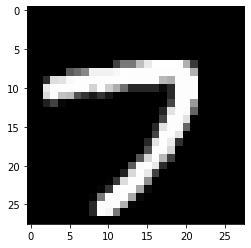

In [ ]:
examples = iter(train_loader)
plt.imshow(list(examples)[0][0][0][0], cmap="gray")
plt.show()

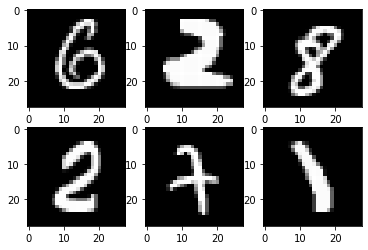

In [ ]:
examples = iter(train_loader)
samples = list(examples)
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[0][0][50+i][0], cmap = "gray")
plt.show()

In [ ]:
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_classes = num_classes
    self.linear1 = nn.Linear(self.input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(self.hidden_size, self.hidden_size)
    self.output = nn.Linear(self.hidden_size, self.num_classes)

  def forward(self, X):
    Z = self.linear1(X)
    Z = self.relu(Z)
    Z = self.linear2(Z)
    Z = self.relu(Z)
    Z = self.output(Z)
    # no softmax at the end
    return Z

model = NeuralNetwork(10, 8, 3)

In [ ]:
# Convolution Neural Network

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Devise configuration

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Hyperparameters

num_epochs = 4
batch_size = 4
learning_rate = 0.01

# dataset has PILImage of range [0,1], we transform them to torch tensors and normalize it to in the range [-1,1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root = "/content/sample_data", download = True, transform = transform, train=True)

test_dataset = torchvision.datasets.CIFAR10(root = "/content/sample_data", download = True, transform = transform, train=False)

train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)

test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Implement ConvNet

class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5) # here 3 is the number of channels in the input, now as it is image with 3 channels so three, 6 is number of filters and 5 is kernel size
    self.pool = nn.MaxPool2d(2, 2) # the first 2 is the kernel size and the second 2 is the stride
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)


  def forward(self, X):
    X = self.pool(F.relu(self.conv1(X)))
    X = self.pool(F.relu(self.conv2(X)))
    X = X.view((-1, 16*5*5))
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return X


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # original shape = [batch_size = 4, channels =3, height = 32, width = 32]
    # input_layer: 3 input channels, 6 output channels and 5 kernel size
    images = images.to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backprop and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%2000 ==0:
      print(f"Epoch: {epoch+1}/{num_epochs}, Step: {i+1}/{n_total_steps}, Loss: {loss.item():.4f} ")

print("Finished Training")

# Evaluation of the trained model

# with torch.no_grad():
#   n_correct = 0
#   n_samples = 0
#   n_class_correct = [0 for i in range(10)]
#   n_class_samples = [0 for i in range(10)]
#   for images, labels in test_loader:
#     images = images.to(device)
#     labels = labels.to(device)
#     outputs = model(images)
#     # max, return (value, index)
#     _, predicted = torch.max(outputs, 1)

# Need to complete it to find accuracy





Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/4, Step: 2000/12500, Loss: 1.3391 
Epoch: 1/4, Step: 4000/12500, Loss: 1.7756 
Epoch: 1/4, Step: 6000/12500, Loss: 2.3612 
Epoch: 1/4, Step: 8000/12500, Loss: 1.6340 
Epoch: 1/4, Step: 10000/12500, Loss: 1.3921 
Epoch: 1/4, Step: 12000/12500, Loss: 1.4833 
Epoch: 2/4, Step: 2000/12500, Loss: 1.5564 
Epoch: 2/4, Step: 4000/12500, Loss: 1.9368 
Epoch: 2/4, Step: 6000/12500, Loss: 1.0725 
Epoch: 2/4, Step: 8000/12500, Loss: 1.0650 
Epoch: 2/4, Step: 10000/12500, Loss: 1.5954 
Epoch: 2/4, Step: 12000/12500, Loss: 1.8940 
Epoch: 3/4, Step: 2000/12500, Loss: 0.5032 
Epoch: 3/4, Step: 4000/12500, Loss: 0.6377 
Epoch: 3/4, Step: 6000/12500, Loss: 1.3550 
Epoch: 3/4, Step: 8000/12500, Loss: 3.1926 
Epoch: 3/4, Step: 10000/12500, Loss: 1.7516 
Epoch: 3/4, Step: 12000/12500, Loss: 0.7931 
Epoch: 4/4, Step: 2000/12500, Loss: 0.2616 
Epoch: 4/4, Step: 4000/12500, Loss: 0.6615 
Epoch: 4/4, Step: 6000/12500, Loss: 2.

In [ ]:
torch.max(torch.tensor([[0.1, 0.2, 0.0, 0.4, 0.0, 0.01, 0.09, 0.1, 0.05, 0.05]]), torch.tensor([[1]*10]))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
# Tranfer Learning

# three new thing we would see here
# ImageFolder, Learning Rate Scheduler, Transfer Learning

import torch
import torch.nn as nn
import torchvision
from torchvision import tranforms, models, datasets
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import os
import copy
import matplotlib.pyplot as plt
import time
import numpy as np

device =  torch.device("cuda" if torch.cuda.is_available() else "cpu")

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

data_transforms = {"train":transforms.Compose([transforms.RandomResizedCrop(224), ])}



In [ ]:
!pip install tensorflow